<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/Best%20ANN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
130/130 [==============================] - 3919s 30s/step - loss: 15.2506 - accuracy: 0.1145 - val_loss: 3.9624 - val_accuracy: 0.2740 - lr: 1.0000e-04
Epoch 2/15
130/130 [==============================] - 30s 227ms/step - loss: 12.0672 - accuracy: 0.1518 - val_loss: 7.6103 - val_accuracy: 0.3040 - lr: 1.0000e-04
Epoch 3/15
130/130 [==============================] - 27s 209ms/step - loss: 10.6061 - accuracy: 0.2090 - val_loss: 4.3063 - val_accuracy: 0.3485 - lr: 1.0000e-04
Epoch 4/15
130/130 [==============================] - ETA: 0s - loss: 10.4840 - accuracy: 0.2201
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
130/130 [==============================] - 29s 220ms/step - loss: 10.4840 - accuracy: 0.2201 - val_loss: 6.0835 - val_accuracy: 0.3113 - lr: 1.0000e-04
Epoch 5/15
130/130 [==============================] - 28s 216ms/step - loss: 5.2981 - accuracy: 0.3396 - val_loss: 2.0003 - val_accuracy: 0.5462 - lr: 2.0000e-05
Epoch 6/15
130/130 [===

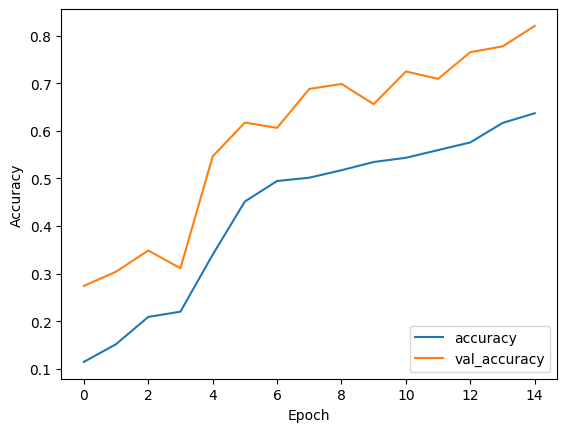

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Custom dataset class
class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, directory, batch_size=32, target_size=(254, 254), shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle

        self.classes = sorted(os.listdir(directory))
        self.num_classes = len(self.classes)
        self.class_to_index = {cls: idx for idx, cls in enumerate(self.classes)}

        self.image_paths = []
        for cls in self.classes:
            cls_dir = os.path.join(directory, cls)
            cls_images = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir)]
            self.image_paths.extend(cls_images)

        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        batch_paths = [self.image_paths[i] for i in batch_indexes]

        batch_images = []
        batch_labels = []
        for path in batch_paths:
            image = load_img(path, target_size=self.target_size)
            image_array = img_to_array(image) / 255.0  # Normalize pixel values
            batch_images.append(image_array)

            label = os.path.basename(os.path.dirname(path))
            label_index = self.class_to_index[label]
            batch_labels.append(label_index)

        batch_images = np.array(batch_images)
        batch_labels = to_categorical(batch_labels, num_classes=self.num_classes)

        return batch_images, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Define paths to your train and test folders
train_dir = '/content/drive/MyDrive/Normalised data/train'
test_dir = '/content/drive/MyDrive/Normalised data/test'

# Set up custom data generators
train_dataset = CustomDataset(train_dir, batch_size=32, target_size=(254, 254), shuffle=True)
test_dataset = CustomDataset(test_dir, batch_size=32, target_size=(254, 254), shuffle=False)

# Define the ANN model architecture
model = Sequential([
    Flatten(input_shape=(254, 254, 3)),  # Flatten the input directly
    Dense(512),
    LeakyReLU(),  # Using LeakyReLU activation
    Dropout(0.5),
    Dense(train_dataset.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=test_dataset,  # Use test dataset for validation
    callbacks=callbacks
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('/content/drive/MyDrive/Normalised data')


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


65/65 [==============================] - 10s 158ms/step - loss: 0.6167 - accuracy: 0.8202
Test Accuracy: 0.8202030062675476
65/65 [==============================] - 9s 131ms/step


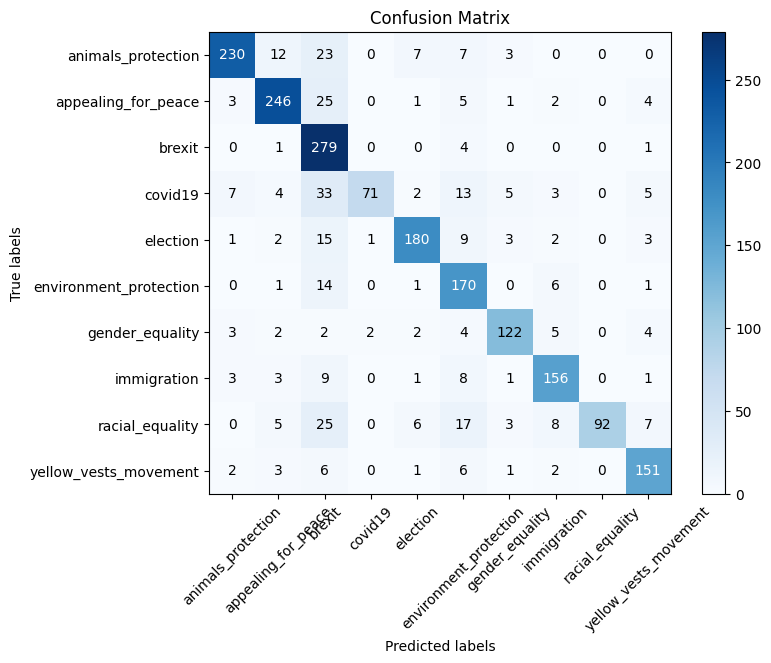

Classification Report:
                        precision    recall  f1-score   support

    animals_protection       0.92      0.82      0.87       282
   appealing_for_peace       0.88      0.86      0.87       287
                brexit       0.65      0.98      0.78       285
               covid19       0.96      0.50      0.65       143
              election       0.90      0.83      0.86       216
environment_protection       0.70      0.88      0.78       193
       gender_equality       0.88      0.84      0.86       146
           immigration       0.85      0.86      0.85       182
       racial_equality       1.00      0.56      0.72       163
 yellow_vests_movement       0.85      0.88      0.87       172

              accuracy                           0.82      2069
             macro avg       0.86      0.80      0.81      2069
          weighted avg       0.85      0.82      0.82      2069



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

# Predict classes for the test data
y_pred = np.argmax(model.predict(test_dataset), axis=-1)

# Get true labels for the test data
y_true = []
for _, label in test_dataset:
    y_true.extend(np.argmax(label, axis=-1))

y_true = np.array(y_true)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(ticks=np.arange(train_dataset.num_classes), labels=train_dataset.classes, rotation=45)
plt.yticks(ticks=np.arange(train_dataset.num_classes), labels=train_dataset.classes)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.title('Confusion Matrix')
plt.show()

# Compute classification report
class_report = classification_report(y_true, y_pred, target_names=train_dataset.classes)
print('Classification Report:')
print(class_report)


In [ ]:
import os
from PIL import Image

# Define the path to your folders
folder1_path = "/content/drive/MyDrive/test"
folder2_path = "/content/drive/MyDrive/train"
output_folder1_path = "/content/drive/MyDrive/Normalised data/test"
output_folder2_path = "/content/drive/MyDrive/Normalised data/train"

# Define the target size
target_size = (254, 254)

def resize_images_in_folder(folder_path, output_folder_path):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Loop through each subfolder in the folder
    for subdir in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subfolder_path):
            # Create the corresponding subfolder in the output folder
            output_subfolder_path = os.path.join(output_folder_path, subdir)
            if not os.path.exists(output_subfolder_path):
                os.makedirs(output_subfolder_path)

            # Loop through each image in the subfolder and resize it
            for file_name in os.listdir(subfolder_path):
                if file_name.endswith(".jpg") or file_name.endswith(".png"):
                    image_path = os.path.join(subfolder_path, file_name)
                    output_image_path = os.path.join(output_subfolder_path, file_name)
                    img = Image.open(image_path)
                    img_resized = img.resize(target_size)
                    img_resized.save(output_image_path)

# Resize images in folder1 and folder2
resize_images_in_folder(folder1_path, output_folder1_path)
resize_images_in_folder(folder2_path, output_folder2_path)


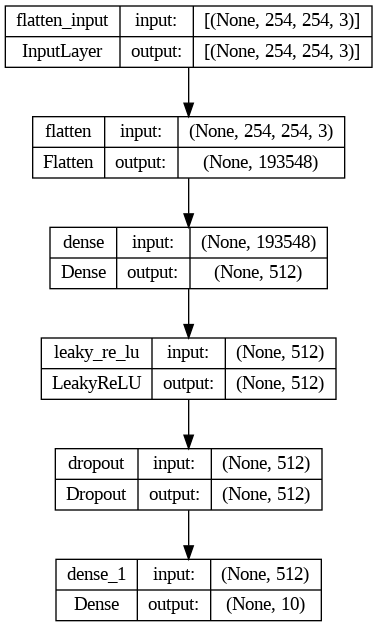

In [6]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
from IPython.display import Image
Image(filename='model_plot.png')


In [22]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.1 MB/s eta 0:00:00


1/1 [==============================] - 0s 18ms/step


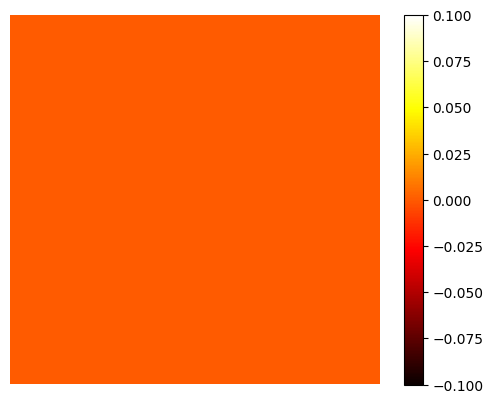

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the saved model
model_path = '/content/drive/MyDrive/Normalised data'  # Update with your model's path
model = tf.keras.models.load_model(model_path)

def occlusion_sensitivity_batch(model, img, target_class, patch_size=16, batch_size=32):
    img = preprocess_input(img)
    img_shape = img.shape
    height, width = img_shape[1], img_shape[2]
    output_height = height - patch_size + 1
    output_width = width - patch_size + 1
    heatmap = np.zeros((output_height, output_width))

    for h in range(0, output_height, batch_size):
        for w in range(0, output_width, batch_size):
            img_copy_batch = np.copy(img)
            img_copy_batch[:, h:h+patch_size, w:w+patch_size, :] = 0  # Occlude the patch for all images in the batch
            preds = model.predict(img_copy_batch)
            confidences = preds[:, target_class]
            heatmap[h:h+batch_size, w:w+batch_size] = np.mean(confidences, axis=-1)

    return heatmap

# Generate occlusion sensitivity heatmap using batch processing
heatmap_batch = occlusion_sensitivity_batch(model, np.expand_dims(img_array, axis=0), target_class)

# Visualize the occlusion sensitivity heatmap
plt.imshow(heatmap_batch, cmap='hot', interpolation='nearest')
plt.axis('off')
plt.colorbar()
plt.show()



The color gradient ranging from dark red to bright yellow indicates the intensity of occlusion sensitivity. Darker regions represent areas where occlusion has a more significant impact on reducing the confidence score for the target class, while brighter regions indicate areas where occlusion has less impact